# ***Exploratory Data Analysis: "Twitter Sentiment Analysis - 2012 US Election"***

Acknowledgements: https://www.kaggle.com/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model

In [2]:
import pandas as pd
import re
from collections import Counter
import seaborn as sns
from palettable.colorbrewer.qualitative import Pastel1_7
import nltk
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def dataClean(tweets_raw):
    cleanTweets = []
    for tweet in tweets_raw:
        tweet = tweet.lower() #convert to lowercase
        tweet = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', tweet) #remove URL
        tweet = re.sub(r'(\s)@\w+', r'', tweet) #remove usernames
        tweet = re.sub(r'@\w+', r'', tweet) #remove usernames
        tweet = re.sub('<[^<]+?>', '', tweet) #remove HTML tags
        # tweet = re.sub(r'[<>!#@$:.,%\?-]+', r'', tweet) #remove punctuation and special characters
        tweet = re.sub('[^A-Za-z0-9 ]+', '', tweet)
        tweet = re.sub(" \d+", " ", tweet) #remove standalone numbers
        lower_case = tweet.lower() #tokenization
        
        words = lower_case.split()
        tweet = ' '.join([w for w in words if not w in nltk.corpus.stopwords.words("english")]) #remove stopwords
        ps = nltk.stem.PorterStemmer()
        stemmedTweet = [ps.stem(word) for word in tweet.split(" ")]
        stemmedTweet = " ".join(stemmedTweet)
        tweet = str(stemmedTweet)
        tweet = tweet.replace("'", "")
        tweet = tweet.replace("\"","")
        cleanTweets.append(tweet)
        
    return cleanTweets

In [5]:
trainingFile = "training-Obama-Romney-tweets.xlsx"
df_obama = pd.read_excel(trainingFile,sheet_name='Obama')
df_romney = pd.read_excel(trainingFile,sheet_name='Romney')

In [6]:
df_obama.drop(df_obama.columns[0], axis=1, inplace = True)
df_obama.drop(df_obama.columns[4:], axis=1, inplace = True)

df_obama.drop([0],inplace=True)
df_obama.rename(columns={df_obama.columns[3]: 'Class'}, inplace = True)

In [7]:
df_romney.drop(df_romney.columns[0], axis=1, inplace = True)
df_romney.drop(df_romney.columns[4:], axis=1, inplace = True)

df_romney.drop([0],inplace=True)
df_romney.rename(columns={df_romney.columns[3]: 'Class'}, inplace = True)

In [8]:
df_obama = df_obama[(df_obama['Class'].isin((1,-1)))]
df_romney = df_romney[(df_romney['Class'].isin((1,-1)))]

In [9]:
obama_tweets_raw = df_obama['Anootated tweet']
obama_class = df_obama['Class']
romney_tweets_raw = df_romney['Anootated tweet']
romney_class = df_romney['Class']

In [10]:
obama_tweets_raw = obama_tweets_raw.tolist()
romney_tweets_raw = romney_tweets_raw.tolist()

In [11]:
obama_class_train = obama_class.tolist()
romney_class_train = romney_class.tolist()

In [12]:
obama_tweets = dataClean(obama_tweets_raw)
romney_tweets = dataClean(romney_tweets_raw)

In [13]:
obama_df = pd.DataFrame(obama_tweets, columns=['Tweet Text'])
obama_df['Class'] = obama_class_train

romney_df = pd.DataFrame(romney_tweets, columns=['Tweet Text'])
romney_df['Class'] = romney_class_train

In [14]:
obama_df['Num_word_text'] = obama_df['Tweet Text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
romney_df['Num_word_text'] = romney_df['Tweet Text'].apply(lambda x:len(str(x).split())) #Number Of words in main text

# ***Exploratory Data Analysis: Obama Tweets***

### Distribution of Class: Obama

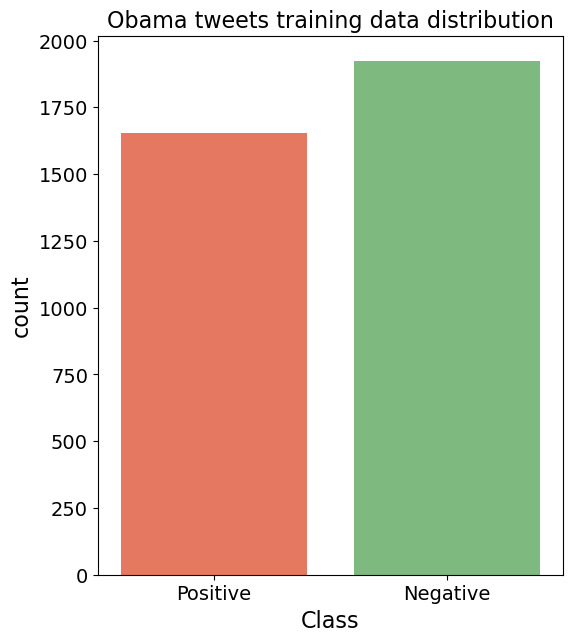

In [69]:
plt.figure(figsize=(6,7))
# increase axis tick size, axis label size, plot title size
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('axes',labelsize=16)

# set bar colors red and blue
sns.countplot(x='Class',data=df_obama.replace({-1: 'Negative', 1: 'Positive'}), palette=['#fb6a4a','#74c476']);
plt.title('Obama tweets training data distribution', fontsize=16);

### Kernel Distribution of Number of Words Per Tweet: Obama

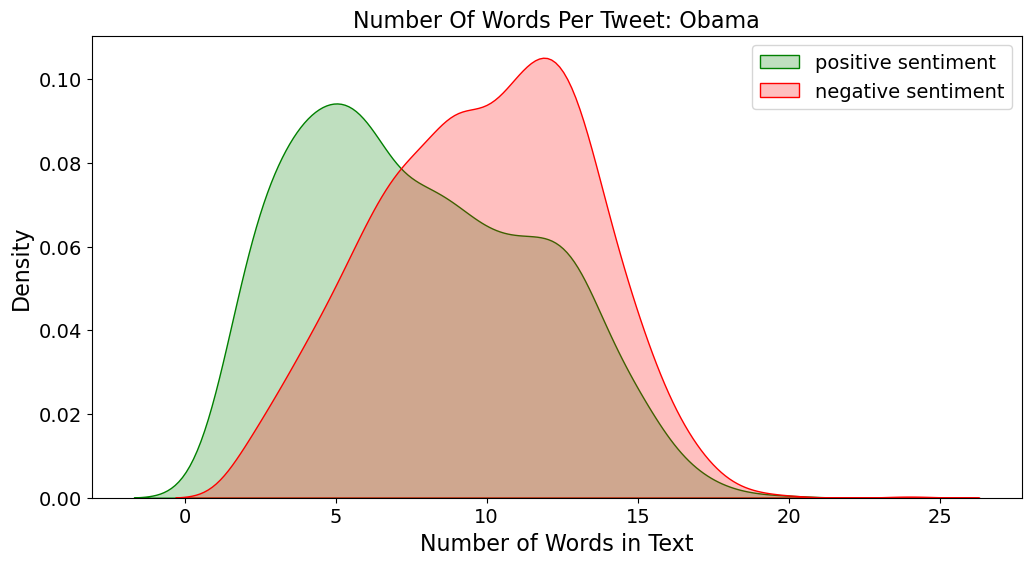

In [30]:
plt.figure(figsize=(12,6))
p1 = sns.kdeplot(obama_df[obama_df['Class']==1]['Num_word_text'], shade=True, color="g")
p1 = sns.kdeplot(obama_df[obama_df['Class']==-1]['Num_word_text'], shade=True, color="r")
plt.legend(labels=['positive sentiment','negative sentiment'], fontsize=14)
plt.xlabel('Number of Words in Text')

plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('axes',labelsize=16)
plt.title('Number Of Words Per Tweet: Obama', fontsize=16);

In [41]:
obama_df['temp_list'] = obama_df['Tweet Text'].apply(lambda x:str(x).split())

In [45]:
Positive_sent_obama = obama_df[obama_df['Class']==1]
Negative_sent_obama = obama_df[obama_df['Class']==-1]

### Most Common Words in Positive Obama Tweets

In [46]:
top_obama = Counter([item for sublist in Positive_sent_obama['temp_list'] for item in sublist])
temp_positive_obama = pd.DataFrame(top_obama.most_common(10))
temp_positive_obama.columns = ['Common_words','count']
print("Most Common words in Positive Obama Tweets are:")
temp_positive_obama.style.background_gradient(cmap='Greens')

Most Common words in Positive Obama Tweets are:


,Common_words,count
0,obama,1693
1,debat,335
2,presid,245
3,vote,231
4,win,153
5,romney,133
6,tonight,115
7,im,88
8,job,80
9,say,73


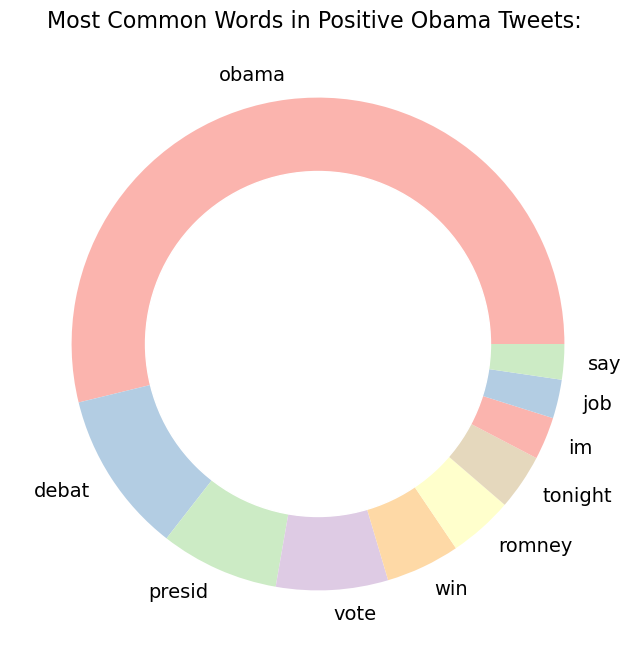

In [51]:
plt.figure(figsize=(12,8))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_positive_obama['count'], labels=temp_positive_obama.Common_words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Most Common Words in Positive Obama Tweets: ', fontsize=16)
plt.show()

### Most Common Words in Negative Obama Tweets

In [52]:
top_obama = Counter([item for sublist in Negative_sent_obama['temp_list'] for item in sublist])
temp_negative_obama = pd.DataFrame(top_obama.most_common(10))
temp_negative_obama.columns = ['Common_words','count']
print("Most Common words in Negative Obama Tweets are:")
temp_negative_obama.style.background_gradient(cmap='Reds')

Most Common words in Negative Obama Tweets are:


,Common_words,count
0,obama,1918
1,debat,210
2,lie,184
3,presid,168
4,vote,140
5,like,127
6,romney,124
7,peopl,114
8,job,101
9,get,98


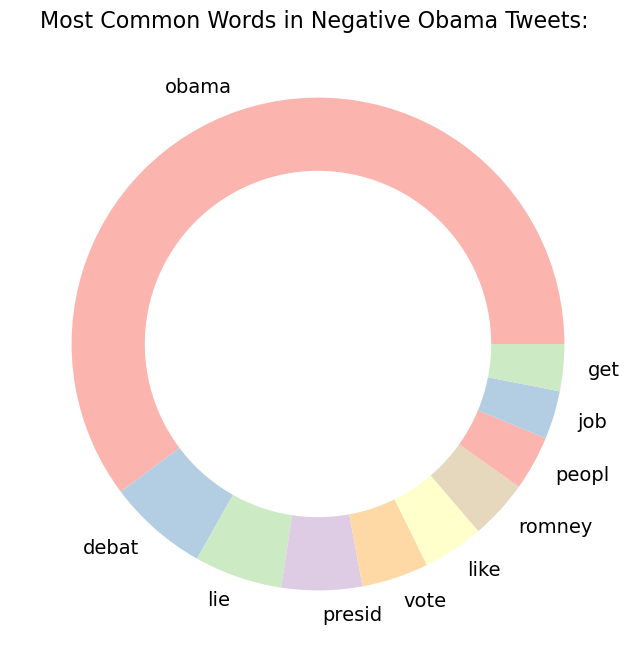

In [53]:
plt.figure(figsize=(12,8))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_negative_obama['count'], labels=temp_negative_obama.Common_words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Most Common Words in Negative Obama Tweets: ', fontsize=16)
plt.show()

In [55]:
raw_text = [word for word_list in obama_df['temp_list'] for word in word_list]

In [56]:
def words_unique(sentiment,numwords,raw_words):
    
    allother = []
    for item in obama_df[obama_df.Class != sentiment]['temp_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in obama_df[obama_df.Class == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

### Top 10 Unique Words in Positive Obama Tweets

In [57]:
Unique_Positive= words_unique(1, 10, raw_text)
print("Top 10 unique words in Positive Obama Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

Top 10 unique words in Positive Obama Tweets are:


,words,count
0,teamobama,22
1,brought,11
2,uppercut,9
3,prayer,8
4,knock,8
5,cours,7
6,fourmoreyear,6
7,grab,6
8,binder,6
9,narrow,6


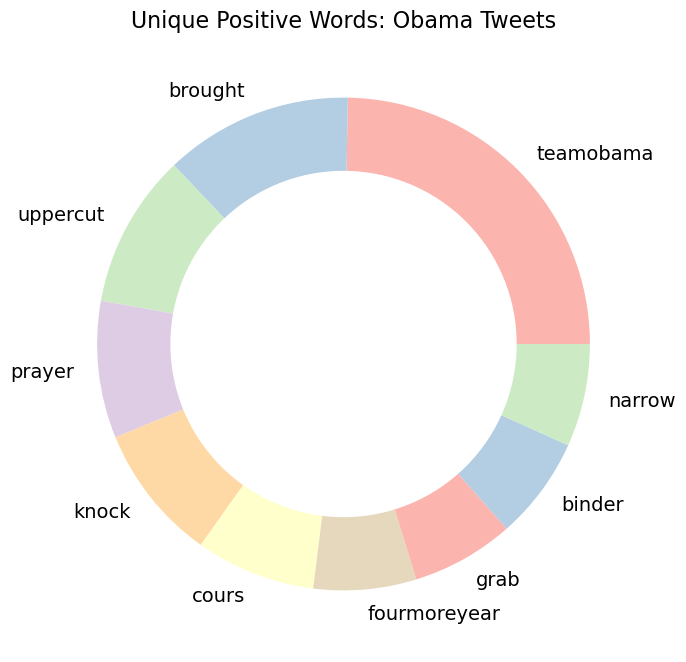

In [59]:
plt.figure(figsize=(12,8))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unique Positive Words: Obama Tweets', fontsize=16)
plt.show()

### Top 10 Unique Words in Negative Obama Tweets

In [60]:
Unique_Negative= words_unique(-1, 10, raw_text)
print("Top 10 unique words in Negative Obama Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

Top 10 unique words in Negative Obama Tweets are:


,words,count
0,coverup,22
1,weak,19
2,green,18
3,israel,16
4,bankruptci,16
5,bailout,15
6,admin,15
7,a123,14
8,romneyryan2012,14
9,mistak,14


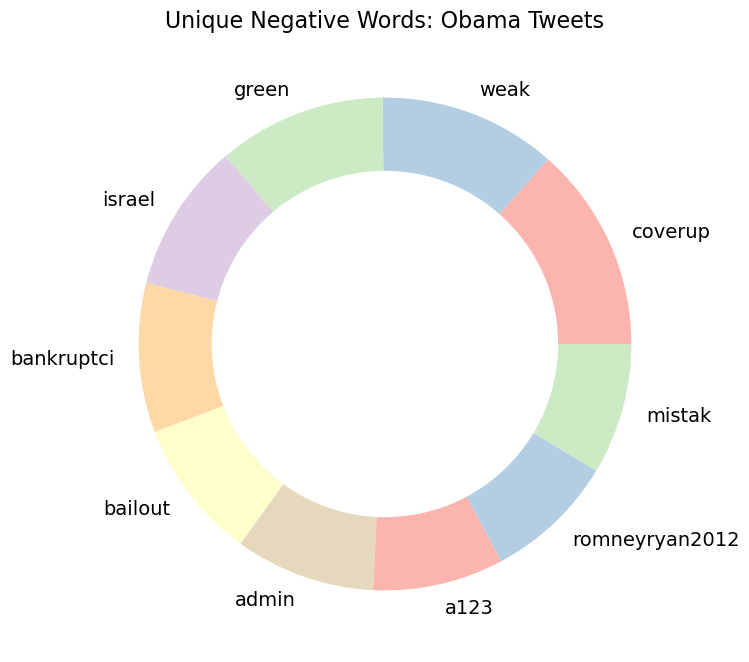

In [61]:
plt.figure(figsize=(12,8))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unique Negative Words: Obama Tweets', fontsize=16)
plt.show()

# ***Exploratory Data Analysis: Romney Tweets***

### Distribution of Class: Romney

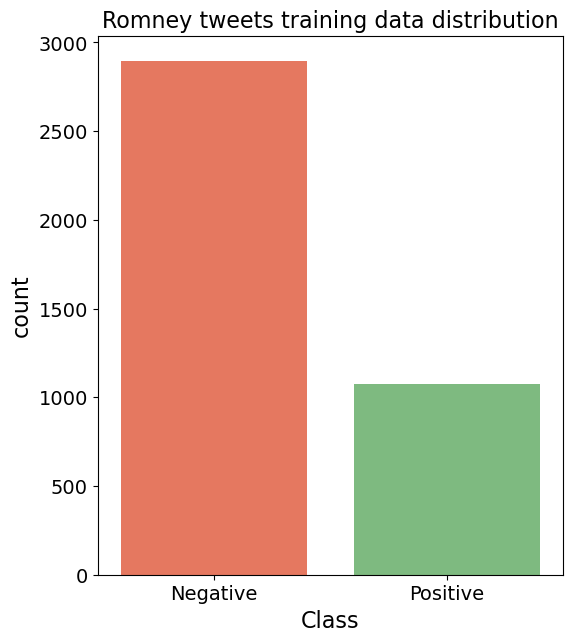

In [70]:
plt.figure(figsize=(6,7))
# increase axis tick size, axis label size, plot title size
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('axes',labelsize=16)

sns.countplot(x='Class',data=df_romney.replace({-1: 'Negative', 1: 'Positive'}), palette=['#fb6a4a','#74c476'])
plt.title('Romney tweets training data distribution', fontsize=16);

### Kernel Distribution of Number of Words Per Tweet: Romney

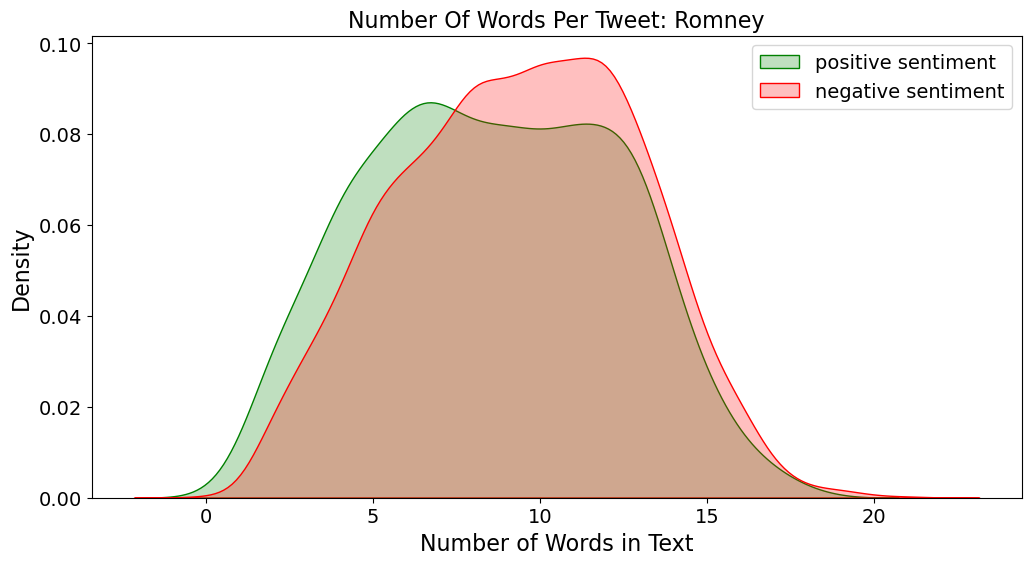

In [71]:
plt.figure(figsize=(12,6))
p1 = sns.kdeplot(romney_df[romney_df['Class']==1]['Num_word_text'], shade=True, color="g")
p1 = sns.kdeplot(romney_df[romney_df['Class']==-1]['Num_word_text'], shade=True, color="r")
plt.legend(labels=['positive sentiment','negative sentiment'], fontsize=14)
plt.xlabel('Number of Words in Text')

plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('axes',labelsize=16)
plt.title('Number Of Words Per Tweet: Romney', fontsize=16);

In [73]:
romney_df['temp_list'] = romney_df['Tweet Text'].apply(lambda x:str(x).split())

In [74]:
Positive_sent_romney = romney_df[romney_df['Class']==1]
Negative_sent_romney = romney_df[romney_df['Class']==-1]

### Most Common Words in Positive Romney Tweets

In [75]:
top_romney = Counter([item for sublist in Positive_sent_romney['temp_list'] for item in sublist])
temp_positive_romney = pd.DataFrame(top_romney.most_common(10))
temp_positive_romney.columns = ['Common_words','count']
print("Most Common words in Positive Romney Tweets are:")
temp_positive_romney.style.background_gradient(cmap='Greens')

Most Common words in Positive Romney Tweets are:


,Common_words,count
0,romney,1018
1,mitt,227
2,vote,144
3,obama,137
4,debat,129
5,win,94
6,poll,79
7,presid,75
8,go,56
9,lead,51


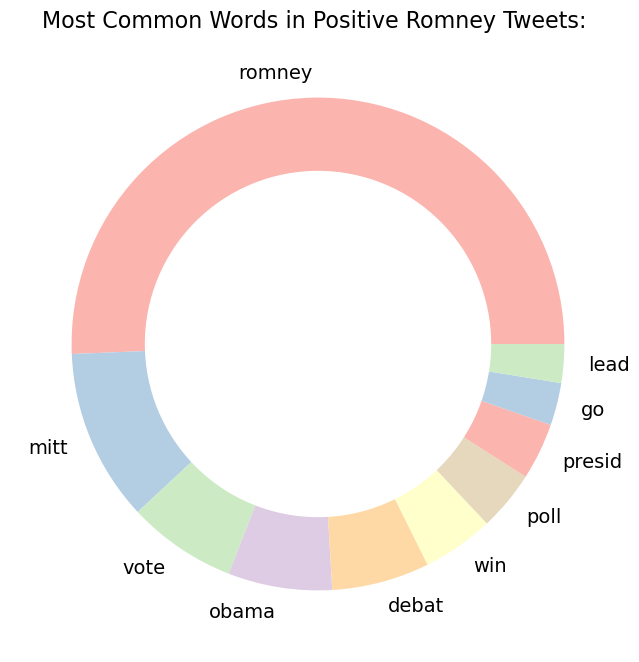

In [76]:
plt.figure(figsize=(12,8))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_positive_romney['count'], labels=temp_positive_romney.Common_words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Most Common Words in Positive Romney Tweets: ', fontsize=16)
plt.show()

### Most Common Words in Negative Romney Tweets

In [77]:
top_romney = Counter([item for sublist in Negative_sent_romney['temp_list'] for item in sublist])
temp_negative_romney = pd.DataFrame(top_romney.most_common(10))
temp_negative_romney.columns = ['Common_words','count']
print("Most Common words in Negative Romney Tweets are:")
temp_negative_romney.style.background_gradient(cmap='Reds')

Most Common words in Negative Romney Tweets are:


,Common_words,count
0,romney,2711
1,mitt,718
2,debat,276
3,plan,252
4,job,250
5,tax,226
6,like,225
7,vote,225
8,obama,205
9,dont,182


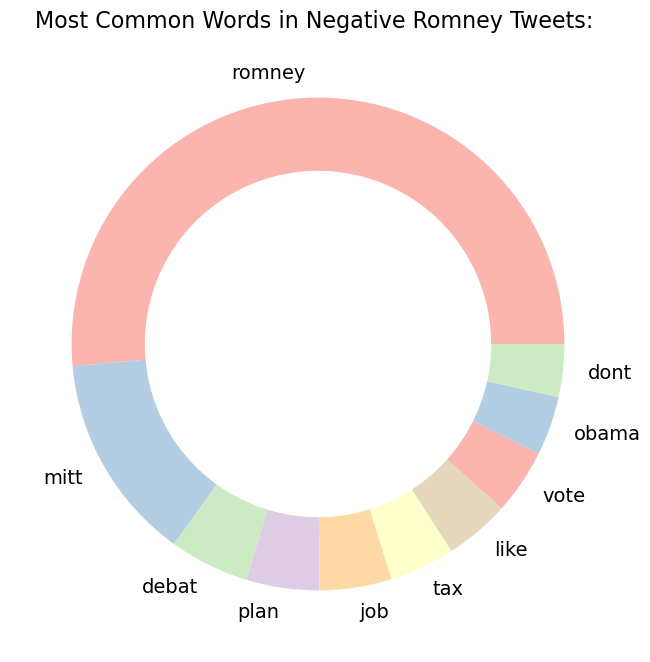

In [78]:
plt.figure(figsize=(12,8))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp_negative_romney['count'], labels=temp_negative_romney.Common_words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Most Common Words in Negative Romney Tweets: ', fontsize=16)
plt.show()

In [79]:
raw_text = [word for word_list in romney_df['temp_list'] for word in word_list]

In [80]:
def words_unique(sentiment,numwords,raw_words):
    
    allother = []
    for item in romney_df[romney_df.Class != sentiment]['temp_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in romney_df[romney_df.Class == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

### Top 10 Unique Words in Positive Romney Tweets

In [81]:
Unique_Positive= words_unique(1, 10, raw_text)
print("Top 10 unique words in Positive Romney Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

Top 10 unique words in Positive Romney Tweets are:


,words,count
0,romney2012,14
1,crowd,9
2,pennsylvania,8
3,pa,8
4,luck,6
5,prayer,6
6,morgan,6
7,past,5
8,lean,5
9,survey,5


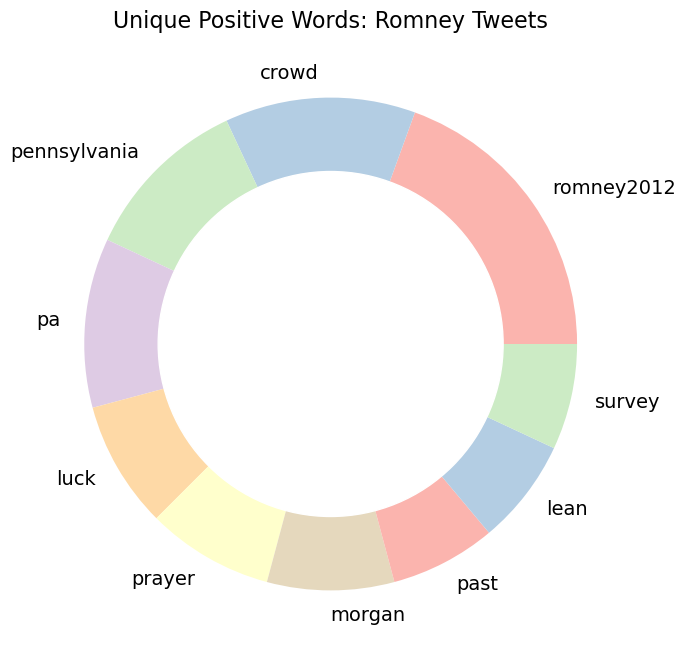

In [82]:
plt.figure(figsize=(12,8))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unique Positive Words: Romney Tweets', fontsize=16)
plt.show()

### Top 10 Unique Words in Negative Romney Tweets

In [83]:
Unique_Negative= words_unique(-1, 10, raw_text)
print("Top 10 unique words in Negative Romney Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

Top 10 unique words in Negative Romney Tweets are:


,words,count
0,massachusett,24
1,hear,22
2,bindersfullofwomen,22
3,bogu,20
4,entir,20
5,fake,19
6,chines,18
7,disrespect,17
8,profit,16
9,dumb,16


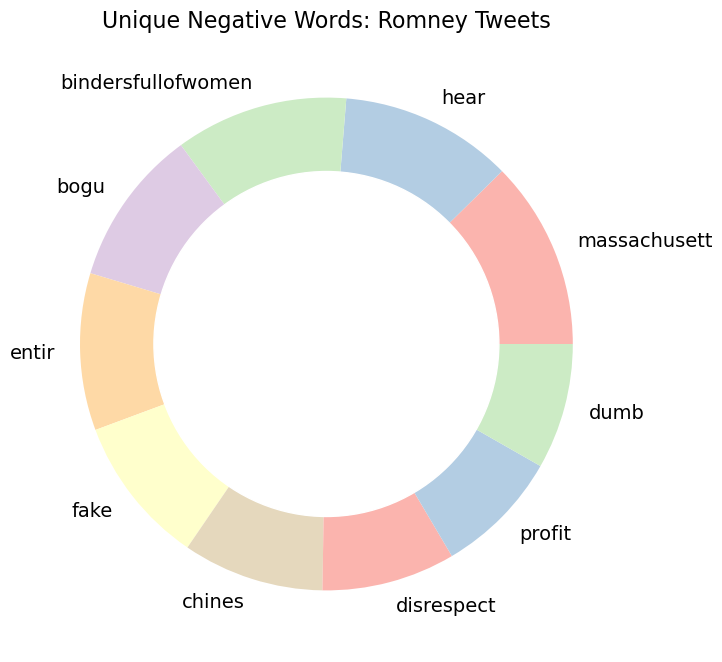

In [84]:
plt.figure(figsize=(12,8))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unique Negative Words: Romney Tweets', fontsize=16)
plt.show()